In [1]:
# Importing used modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,classification_report,confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD

In [2]:
# Importing data and cleaning it up
df = pd.read_csv('../ML-Cancer-SCC-2020-21/Children\'s Oncology Group Study 9906 for High-Risk Pediatric Training Stats (1).csv')

df = df.drop('TRAINING OR TEST SET?', axis = 1)

df = df.drop("Sample", axis =1)

dummies = pd.get_dummies(df['CONGENITAL ABNORMALITY'], drop_first = True, prefix= "CONGENITAL ABNORMALITY")
df = pd.concat([df.drop('CONGENITAL ABNORMALITY', axis=1), dummies], axis=1)

dummies = pd.get_dummies(df['CNS STATUS'], drop_first = True, prefix= "CNS STATUS")
df = pd.concat([df.drop('CNS STATUS', axis=1), dummies], axis=1)

dummies = pd.get_dummies(df['TESTICULAR INVOLVEMENT'], drop_first = True, prefix= "TESTICULAR INVOLVEMENT")
df = pd.concat([df.drop('TESTICULAR INVOLVEMENT', axis=1), dummies], axis=1)

dummies = pd.get_dummies(df['GENDER'], drop_first = True, prefix= "GENDER")
df = pd.concat([df.drop('GENDER', axis=1), dummies], axis=1)

dummies = pd.get_dummies(df['E2A-PBX, T(1;19)'], drop_first = True, prefix= "E2A-PBX, T(1;19)")
df = pd.concat([df.drop('E2A-PBX, T(1;19)', axis=1), dummies], axis=1)

df = df.drop("BCR-ABL, T(9;22)", axis =1)

dummies = pd.get_dummies(df['TEL-AML,T(12;21)'], drop_first = True, prefix= "TEL-AML,T(12;21)")
df = pd.concat([df.drop('TEL-AML,T(12;21)', axis=1), dummies], axis=1)

dummies = pd.get_dummies(df['TISSUE TYPE'], drop_first = True, prefix= "TISSUE TYPE")
df = pd.concat([df.drop('TISSUE TYPE', axis=1), dummies], axis=1)

dummies = pd.get_dummies(df['RACE'], drop_first = True, prefix= "RACE")
df = pd.concat([df.drop('RACE', axis=1), dummies], axis=1)

dummies = pd.get_dummies(df['TRISOMY 4 AND 10'], drop_first = True, prefix= "TRISOMY 4 AND 10")
df = pd.concat([df.drop('TRISOMY 4 AND 10', axis=1), dummies], axis=1)

df = df.drop("AMPLIFICATION SET", axis = 1)

df = df.drop("HYBRIDIZATION SET", axis = 1)

# dummies = pd.get_dummies(df['MLL'], drop_first = False, prefix= "MLL")
# df = pd.concat([df.drop('MLL', axis=1), dummies], axis=1)

In [3]:
le = LabelEncoder()
df["MLL_encoded"] = le.fit_transform(df.MLL)
df = df.drop("MLL", axis = 1)

In [4]:
df.head()

,"BLAST COUNT, % OF SAMPLE, -1=UNAVAILABLE","SAMPLE VIABILITY, % OF SAMPLE, -1=UNAVAILABLE",AGE IN DAYS AT DIAGNOSIS,"WBC, 1000/MICROLITER",CONGENITAL ABNORMALITY_None,CONGENITAL ABNORMALITY_Other,CONGENITAL ABNORMALITY_Unknown,"CNS STATUS_> 5 CSF WBC/ul with blasts on cytospin and/or eye involvement, cranial nerve involvement, parenchymal brain involvement",CNS STATUS_No CNS disease,TESTICULAR INVOLVEMENT_Positive,...,RACE_Asian,RACE_Black or African American,RACE_Hispanic or Latino,RACE_Native Hawaiian or other Pacific Islander,RACE_Other,RACE_White,RACE_unknown,TRISOMY 4 AND 10_Positive,TRISOMY 4 AND 10_Unknown,MLL_encoded
0,90,66,5349,147.6,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,95,85,4918,5.5,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,95,88,5857,13.3,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,-1,46,713,110.3,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,90,98,5183,23.0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [5]:
df['MLL_encoded'].value_counts()

0    186
1     21
Name: MLL_encoded, dtype: int64

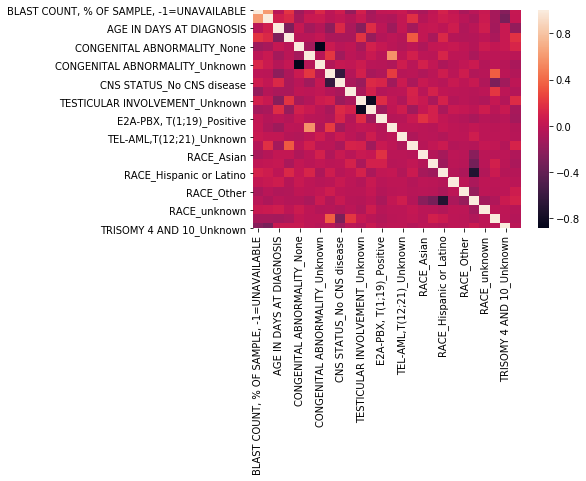

In [6]:
sns.heatmap(df.corr())

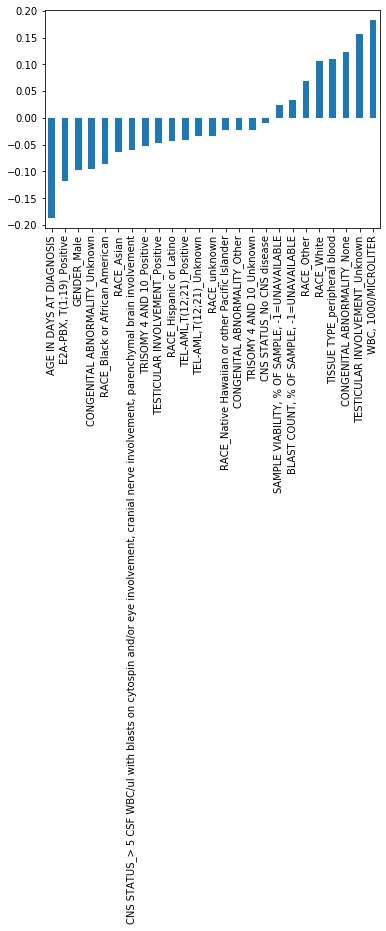

In [7]:
df.corr()['MLL_encoded'][:-1].sort_values().plot(kind='bar')

In [8]:
X = df.drop('MLL_encoded', axis = 1).values
y = df['MLL_encoded'].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [10]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
model = Sequential()

In [12]:
print(X_train.shape)
print(X_test.shape)

(155, 25)
(52, 25)


In [13]:
model.add(Dense(50, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

In [14]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=10)

In [15]:
model.fit(x=X_train, y=y_train, validation_data=(X_test,y_test), batch_size=128, epochs = 1000)

Train on 155 samples, validate on 52 samples
Epoch 1/1000
155/155 [==============================] - 1s 7ms/sample - loss: 0.4996 - accuracy: 0.8323 - val_loss: 0.4708 - val_accuracy: 0.8654
Epoch 2/1000
155/155 [==============================] - 0s 161us/sample - loss: 0.4738 - accuracy: 0.8645 - val_loss: 0.4235 - val_accuracy: 0.8654
Epoch 3/1000
155/155 [==============================] - 0s 213us/sample - loss: 0.4315 - accuracy: 0.8839 - val_loss: 0.3703 - val_accuracy: 0.9038
Epoch 4/1000
155/155 [==============================] - 0s 187us/sample - loss: 0.3898 - accuracy: 0.8968 - val_loss: 0.3260 - val_accuracy: 0.9038
Epoch 5/1000
155/155 [==============================] - 0s 168us/sample - loss: 0.3577 - accuracy: 0.8968 - val_loss: 0.2957 - val_accuracy: 0.9231
Epoch 6/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.3394 - accuracy: 0.8968 - val_loss: 0.2775 - val_accuracy: 0.9231
Epoch 7/1000
155/155 [==============================] - 0s 155us/samp

Epoch 56/1000
155/155 [==============================] - 0s 123us/sample - loss: 0.2908 - accuracy: 0.8968 - val_loss: 0.2564 - val_accuracy: 0.9231
Epoch 57/1000
155/155 [==============================] - 0s 129us/sample - loss: 0.2902 - accuracy: 0.8968 - val_loss: 0.2559 - val_accuracy: 0.9231
Epoch 58/1000
155/155 [==============================] - 0s 161us/sample - loss: 0.2897 - accuracy: 0.8968 - val_loss: 0.2556 - val_accuracy: 0.9231
Epoch 59/1000
155/155 [==============================] - 0s 155us/sample - loss: 0.2891 - accuracy: 0.8968 - val_loss: 0.2552 - val_accuracy: 0.9231
Epoch 60/1000
155/155 [==============================] - 0s 174us/sample - loss: 0.2886 - accuracy: 0.8968 - val_loss: 0.2541 - val_accuracy: 0.9231
Epoch 61/1000
155/155 [==============================] - 0s 123us/sample - loss: 0.2880 - accuracy: 0.8968 - val_loss: 0.2526 - val_accuracy: 0.9231
Epoch 62/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.2875 - accuracy: 0.8968

Epoch 111/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.2719 - accuracy: 0.8968 - val_loss: 0.2496 - val_accuracy: 0.9231
Epoch 112/1000
155/155 [==============================] - 0s 129us/sample - loss: 0.2716 - accuracy: 0.8968 - val_loss: 0.2498 - val_accuracy: 0.9231
Epoch 113/1000
155/155 [==============================] - 0s 135us/sample - loss: 0.2713 - accuracy: 0.8968 - val_loss: 0.2499 - val_accuracy: 0.9231
Epoch 114/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.2709 - accuracy: 0.8968 - val_loss: 0.2503 - val_accuracy: 0.9231
Epoch 115/1000
155/155 [==============================] - 0s 123us/sample - loss: 0.2707 - accuracy: 0.8968 - val_loss: 0.2509 - val_accuracy: 0.9231
Epoch 116/1000
155/155 [==============================] - 0s 148us/sample - loss: 0.2705 - accuracy: 0.8968 - val_loss: 0.2513 - val_accuracy: 0.9231
Epoch 117/1000
155/155 [==============================] - 0s 157us/sample - loss: 0.2702 - accuracy:

155/155 [==============================] - 0s 129us/sample - loss: 0.2592 - accuracy: 0.8968 - val_loss: 0.2501 - val_accuracy: 0.9231
Epoch 166/1000
155/155 [==============================] - 0s 129us/sample - loss: 0.2591 - accuracy: 0.8968 - val_loss: 0.2505 - val_accuracy: 0.9231
Epoch 167/1000
155/155 [==============================] - 0s 129us/sample - loss: 0.2589 - accuracy: 0.8968 - val_loss: 0.2506 - val_accuracy: 0.9231
Epoch 168/1000
155/155 [==============================] - 0s 123us/sample - loss: 0.2588 - accuracy: 0.8968 - val_loss: 0.2503 - val_accuracy: 0.9231
Epoch 169/1000
155/155 [==============================] - 0s 129us/sample - loss: 0.2584 - accuracy: 0.8968 - val_loss: 0.2496 - val_accuracy: 0.9231
Epoch 170/1000
155/155 [==============================] - 0s 148us/sample - loss: 0.2582 - accuracy: 0.8968 - val_loss: 0.2490 - val_accuracy: 0.9231
Epoch 171/1000
155/155 [==============================] - 0s 129us/sample - loss: 0.2581 - accuracy: 0.8968 - val_l

Epoch 220/1000
155/155 [==============================] - 0s 135us/sample - loss: 0.2518 - accuracy: 0.8968 - val_loss: 0.2541 - val_accuracy: 0.9231
Epoch 221/1000
155/155 [==============================] - 0s 148us/sample - loss: 0.2511 - accuracy: 0.8968 - val_loss: 0.2531 - val_accuracy: 0.9231
Epoch 222/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.2505 - accuracy: 0.8968 - val_loss: 0.2520 - val_accuracy: 0.9231
Epoch 223/1000
155/155 [==============================] - 0s 155us/sample - loss: 0.2497 - accuracy: 0.8968 - val_loss: 0.2511 - val_accuracy: 0.9231
Epoch 224/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.2496 - accuracy: 0.8968 - val_loss: 0.2505 - val_accuracy: 0.9231
Epoch 225/1000
155/155 [==============================] - 0s 136us/sample - loss: 0.2492 - accuracy: 0.8968 - val_loss: 0.2501 - val_accuracy: 0.9231
Epoch 226/1000
155/155 [==============================] - 0s 123us/sample - loss: 0.2491 - accuracy:

155/155 [==============================] - 0s 142us/sample - loss: 0.2403 - accuracy: 0.8968 - val_loss: 0.2464 - val_accuracy: 0.9231
Epoch 275/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.2403 - accuracy: 0.8968 - val_loss: 0.2463 - val_accuracy: 0.9231
Epoch 276/1000
155/155 [==============================] - 0s 129us/sample - loss: 0.2402 - accuracy: 0.8968 - val_loss: 0.2463 - val_accuracy: 0.9231
Epoch 277/1000
155/155 [==============================] - 0s 155us/sample - loss: 0.2399 - accuracy: 0.8968 - val_loss: 0.2465 - val_accuracy: 0.9231
Epoch 278/1000
155/155 [==============================] - 0s 149us/sample - loss: 0.2396 - accuracy: 0.8968 - val_loss: 0.2468 - val_accuracy: 0.9231
Epoch 279/1000
155/155 [==============================] - 0s 129us/sample - loss: 0.2392 - accuracy: 0.8968 - val_loss: 0.2472 - val_accuracy: 0.9231
Epoch 280/1000
155/155 [==============================] - 0s 148us/sample - loss: 0.2390 - accuracy: 0.8968 - val_l

Epoch 329/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.2310 - accuracy: 0.9032 - val_loss: 0.2520 - val_accuracy: 0.9231
Epoch 330/1000
155/155 [==============================] - 0s 129us/sample - loss: 0.2307 - accuracy: 0.9032 - val_loss: 0.2519 - val_accuracy: 0.9231
Epoch 331/1000
155/155 [==============================] - 0s 135us/sample - loss: 0.2305 - accuracy: 0.9032 - val_loss: 0.2517 - val_accuracy: 0.9231
Epoch 332/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.2305 - accuracy: 0.9032 - val_loss: 0.2513 - val_accuracy: 0.9231
Epoch 333/1000
155/155 [==============================] - 0s 127us/sample - loss: 0.2304 - accuracy: 0.9032 - val_loss: 0.2512 - val_accuracy: 0.9231
Epoch 334/1000
155/155 [==============================] - 0s 148us/sample - loss: 0.2302 - accuracy: 0.9032 - val_loss: 0.2513 - val_accuracy: 0.9231
Epoch 335/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.2299 - accuracy:

155/155 [==============================] - 0s 135us/sample - loss: 0.2231 - accuracy: 0.9097 - val_loss: 0.2575 - val_accuracy: 0.9231
Epoch 384/1000
155/155 [==============================] - 0s 155us/sample - loss: 0.2235 - accuracy: 0.9097 - val_loss: 0.2581 - val_accuracy: 0.9231
Epoch 385/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.2234 - accuracy: 0.9097 - val_loss: 0.2578 - val_accuracy: 0.9231
Epoch 386/1000
155/155 [==============================] - 0s 129us/sample - loss: 0.2230 - accuracy: 0.9097 - val_loss: 0.2574 - val_accuracy: 0.9231
Epoch 387/1000
155/155 [==============================] - 0s 149us/sample - loss: 0.2222 - accuracy: 0.9097 - val_loss: 0.2571 - val_accuracy: 0.9231
Epoch 388/1000
155/155 [==============================] - 0s 129us/sample - loss: 0.2216 - accuracy: 0.9097 - val_loss: 0.2567 - val_accuracy: 0.9231
Epoch 389/1000
155/155 [==============================] - 0s 136us/sample - loss: 0.2213 - accuracy: 0.9097 - val_l

Epoch 438/1000
155/155 [==============================] - 0s 135us/sample - loss: 0.2132 - accuracy: 0.9097 - val_loss: 0.2543 - val_accuracy: 0.9231
Epoch 439/1000
155/155 [==============================] - 0s 148us/sample - loss: 0.2130 - accuracy: 0.9097 - val_loss: 0.2544 - val_accuracy: 0.9231
Epoch 440/1000
155/155 [==============================] - 0s 136us/sample - loss: 0.2134 - accuracy: 0.9032 - val_loss: 0.2546 - val_accuracy: 0.9231
Epoch 441/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.2137 - accuracy: 0.9032 - val_loss: 0.2548 - val_accuracy: 0.9231
Epoch 442/1000
155/155 [==============================] - 0s 148us/sample - loss: 0.2141 - accuracy: 0.9032 - val_loss: 0.2550 - val_accuracy: 0.9231
Epoch 443/1000
155/155 [==============================] - 0s 135us/sample - loss: 0.2141 - accuracy: 0.9032 - val_loss: 0.2553 - val_accuracy: 0.9231
Epoch 444/1000
155/155 [==============================] - 0s 148us/sample - loss: 0.2137 - accuracy:

155/155 [==============================] - 0s 174us/sample - loss: 0.2050 - accuracy: 0.9097 - val_loss: 0.2558 - val_accuracy: 0.9231
Epoch 493/1000
155/155 [==============================] - 0s 129us/sample - loss: 0.2049 - accuracy: 0.9097 - val_loss: 0.2560 - val_accuracy: 0.9231
Epoch 494/1000
155/155 [==============================] - 0s 136us/sample - loss: 0.2048 - accuracy: 0.9097 - val_loss: 0.2563 - val_accuracy: 0.9231
Epoch 495/1000
155/155 [==============================] - 0s 122us/sample - loss: 0.2046 - accuracy: 0.9097 - val_loss: 0.2565 - val_accuracy: 0.9231
Epoch 496/1000
155/155 [==============================] - 0s 155us/sample - loss: 0.2044 - accuracy: 0.9097 - val_loss: 0.2568 - val_accuracy: 0.9231
Epoch 497/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.2044 - accuracy: 0.9097 - val_loss: 0.2569 - val_accuracy: 0.9231
Epoch 498/1000
155/155 [==============================] - 0s 135us/sample - loss: 0.2043 - accuracy: 0.9097 - val_l

Epoch 547/1000
155/155 [==============================] - 0s 129us/sample - loss: 0.1978 - accuracy: 0.9097 - val_loss: 0.2604 - val_accuracy: 0.9231
Epoch 548/1000
155/155 [==============================] - 0s 148us/sample - loss: 0.1978 - accuracy: 0.9097 - val_loss: 0.2608 - val_accuracy: 0.9231
Epoch 549/1000
155/155 [==============================] - 0s 129us/sample - loss: 0.1976 - accuracy: 0.9097 - val_loss: 0.2611 - val_accuracy: 0.9231
Epoch 550/1000
155/155 [==============================] - 0s 123us/sample - loss: 0.1973 - accuracy: 0.9097 - val_loss: 0.2612 - val_accuracy: 0.9231
Epoch 551/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.1971 - accuracy: 0.9097 - val_loss: 0.2613 - val_accuracy: 0.9231
Epoch 552/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.1967 - accuracy: 0.9097 - val_loss: 0.2617 - val_accuracy: 0.9231
Epoch 553/1000
155/155 [==============================] - 0s 148us/sample - loss: 0.1966 - accuracy:

155/155 [==============================] - 0s 174us/sample - loss: 0.1906 - accuracy: 0.9097 - val_loss: 0.2591 - val_accuracy: 0.9231
Epoch 602/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.1905 - accuracy: 0.9097 - val_loss: 0.2589 - val_accuracy: 0.9231
Epoch 603/1000
155/155 [==============================] - 0s 135us/sample - loss: 0.1905 - accuracy: 0.9097 - val_loss: 0.2587 - val_accuracy: 0.9231
Epoch 604/1000
155/155 [==============================] - 0s 155us/sample - loss: 0.1904 - accuracy: 0.9097 - val_loss: 0.2585 - val_accuracy: 0.9231
Epoch 605/1000
155/155 [==============================] - 0s 148us/sample - loss: 0.1905 - accuracy: 0.9097 - val_loss: 0.2585 - val_accuracy: 0.9231
Epoch 606/1000
155/155 [==============================] - 0s 155us/sample - loss: 0.1904 - accuracy: 0.9097 - val_loss: 0.2586 - val_accuracy: 0.9231
Epoch 607/1000
155/155 [==============================] - 0s 129us/sample - loss: 0.1903 - accuracy: 0.9097 - val_l

Epoch 656/1000
155/155 [==============================] - 0s 136us/sample - loss: 0.1838 - accuracy: 0.9161 - val_loss: 0.2614 - val_accuracy: 0.9231
Epoch 657/1000
155/155 [==============================] - 0s 136us/sample - loss: 0.1838 - accuracy: 0.9161 - val_loss: 0.2611 - val_accuracy: 0.9231
Epoch 658/1000
155/155 [==============================] - 0s 148us/sample - loss: 0.1837 - accuracy: 0.9161 - val_loss: 0.2615 - val_accuracy: 0.9231
Epoch 659/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.1835 - accuracy: 0.9161 - val_loss: 0.2625 - val_accuracy: 0.9231
Epoch 660/1000
155/155 [==============================] - 0s 136us/sample - loss: 0.1832 - accuracy: 0.9161 - val_loss: 0.2635 - val_accuracy: 0.9231
Epoch 661/1000
155/155 [==============================] - 0s 174us/sample - loss: 0.1831 - accuracy: 0.9161 - val_loss: 0.2643 - val_accuracy: 0.9231
Epoch 662/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.1831 - accuracy:

155/155 [==============================] - 0s 135us/sample - loss: 0.1764 - accuracy: 0.9226 - val_loss: 0.2595 - val_accuracy: 0.9231
Epoch 711/1000
155/155 [==============================] - 0s 129us/sample - loss: 0.1765 - accuracy: 0.9226 - val_loss: 0.2593 - val_accuracy: 0.9231
Epoch 712/1000
155/155 [==============================] - 0s 136us/sample - loss: 0.1764 - accuracy: 0.9226 - val_loss: 0.2596 - val_accuracy: 0.9231
Epoch 713/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.1764 - accuracy: 0.9226 - val_loss: 0.2600 - val_accuracy: 0.9231
Epoch 714/1000
155/155 [==============================] - 0s 136us/sample - loss: 0.1763 - accuracy: 0.9226 - val_loss: 0.2601 - val_accuracy: 0.9231
Epoch 715/1000
155/155 [==============================] - 0s 135us/sample - loss: 0.1763 - accuracy: 0.9226 - val_loss: 0.2602 - val_accuracy: 0.9231
Epoch 716/1000
155/155 [==============================] - 0s 129us/sample - loss: 0.1765 - accuracy: 0.9226 - val_l

Epoch 765/1000
155/155 [==============================] - 0s 135us/sample - loss: 0.1708 - accuracy: 0.9419 - val_loss: 0.2685 - val_accuracy: 0.8846
Epoch 766/1000
155/155 [==============================] - 0s 135us/sample - loss: 0.1707 - accuracy: 0.9419 - val_loss: 0.2675 - val_accuracy: 0.8846
Epoch 767/1000
155/155 [==============================] - 0s 129us/sample - loss: 0.1705 - accuracy: 0.9419 - val_loss: 0.2668 - val_accuracy: 0.8846
Epoch 768/1000
155/155 [==============================] - 0s 139us/sample - loss: 0.1705 - accuracy: 0.9419 - val_loss: 0.2663 - val_accuracy: 0.8846
Epoch 769/1000
155/155 [==============================] - 0s 155us/sample - loss: 0.1704 - accuracy: 0.9419 - val_loss: 0.2661 - val_accuracy: 0.8846
Epoch 770/1000
155/155 [==============================] - 0s 148us/sample - loss: 0.1704 - accuracy: 0.9419 - val_loss: 0.2659 - val_accuracy: 0.8846
Epoch 771/1000
155/155 [==============================] - 0s 135us/sample - loss: 0.1705 - accuracy:

155/155 [==============================] - 0s 142us/sample - loss: 0.1655 - accuracy: 0.9419 - val_loss: 0.2677 - val_accuracy: 0.8846
Epoch 820/1000
155/155 [==============================] - 0s 135us/sample - loss: 0.1662 - accuracy: 0.9290 - val_loss: 0.2677 - val_accuracy: 0.9038
Epoch 821/1000
155/155 [==============================] - 0s 155us/sample - loss: 0.1662 - accuracy: 0.9290 - val_loss: 0.2682 - val_accuracy: 0.8846
Epoch 822/1000
155/155 [==============================] - 0s 136us/sample - loss: 0.1659 - accuracy: 0.9290 - val_loss: 0.2689 - val_accuracy: 0.8846
Epoch 823/1000
155/155 [==============================] - 0s 148us/sample - loss: 0.1653 - accuracy: 0.9290 - val_loss: 0.2700 - val_accuracy: 0.8846
Epoch 824/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.1648 - accuracy: 0.9419 - val_loss: 0.2714 - val_accuracy: 0.8846
Epoch 825/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.1647 - accuracy: 0.9419 - val_l

Epoch 874/1000
155/155 [==============================] - 0s 149us/sample - loss: 0.1602 - accuracy: 0.9419 - val_loss: 0.2739 - val_accuracy: 0.8846
Epoch 875/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.1599 - accuracy: 0.9419 - val_loss: 0.2719 - val_accuracy: 0.8846
Epoch 876/1000
155/155 [==============================] - 0s 155us/sample - loss: 0.1598 - accuracy: 0.9419 - val_loss: 0.2711 - val_accuracy: 0.8846
Epoch 877/1000
155/155 [==============================] - 0s 129us/sample - loss: 0.1602 - accuracy: 0.9419 - val_loss: 0.2709 - val_accuracy: 0.8846
Epoch 878/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.1611 - accuracy: 0.9419 - val_loss: 0.2707 - val_accuracy: 0.8846
Epoch 879/1000
155/155 [==============================] - 0s 161us/sample - loss: 0.1610 - accuracy: 0.9419 - val_loss: 0.2705 - val_accuracy: 0.8846
Epoch 880/1000
155/155 [==============================] - 0s 129us/sample - loss: 0.1604 - accuracy:

155/155 [==============================] - 0s 148us/sample - loss: 0.1552 - accuracy: 0.9419 - val_loss: 0.2761 - val_accuracy: 0.8846
Epoch 929/1000
155/155 [==============================] - 0s 129us/sample - loss: 0.1555 - accuracy: 0.9419 - val_loss: 0.2754 - val_accuracy: 0.8846
Epoch 930/1000
155/155 [==============================] - 0s 135us/sample - loss: 0.1560 - accuracy: 0.9419 - val_loss: 0.2750 - val_accuracy: 0.8846
Epoch 931/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.1560 - accuracy: 0.9419 - val_loss: 0.2752 - val_accuracy: 0.8846
Epoch 932/1000
155/155 [==============================] - 0s 148us/sample - loss: 0.1555 - accuracy: 0.9419 - val_loss: 0.2760 - val_accuracy: 0.8846
Epoch 933/1000
155/155 [==============================] - 0s 129us/sample - loss: 0.1549 - accuracy: 0.9419 - val_loss: 0.2767 - val_accuracy: 0.8846
Epoch 934/1000
155/155 [==============================] - 0s 161us/sample - loss: 0.1544 - accuracy: 0.9419 - val_l

Epoch 983/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.1509 - accuracy: 0.9419 - val_loss: 0.2792 - val_accuracy: 0.8846
Epoch 984/1000
155/155 [==============================] - 0s 123us/sample - loss: 0.1509 - accuracy: 0.9419 - val_loss: 0.2791 - val_accuracy: 0.8846
Epoch 985/1000
155/155 [==============================] - 0s 154us/sample - loss: 0.1509 - accuracy: 0.9419 - val_loss: 0.2795 - val_accuracy: 0.8846
Epoch 986/1000
155/155 [==============================] - 0s 161us/sample - loss: 0.1508 - accuracy: 0.9419 - val_loss: 0.2800 - val_accuracy: 0.8846
Epoch 987/1000
155/155 [==============================] - 0s 148us/sample - loss: 0.1507 - accuracy: 0.9419 - val_loss: 0.2808 - val_accuracy: 0.9038
Epoch 988/1000
155/155 [==============================] - 0s 168us/sample - loss: 0.1507 - accuracy: 0.9419 - val_loss: 0.2818 - val_accuracy: 0.9038
Epoch 989/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.1501 - accuracy:

In [16]:
loss = pd.DataFrame(model.history.history)

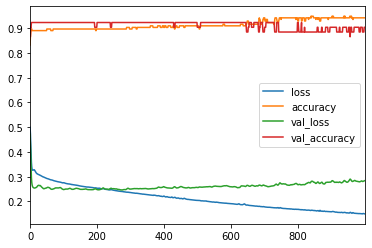

In [17]:
loss.plot();

In [18]:
predict = model.predict_classes(X_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        48
           1       0.33      0.25      0.29         4

    accuracy                           0.90        52
   macro avg       0.64      0.60      0.62        52
weighted avg       0.89      0.90      0.90        52



In [19]:
X = df.drop('MLL_encoded', axis = 1).values
y = df['MLL_encoded'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model2 = Sequential()
model2.add(Dense(50, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=10)

model2.fit(x=X_train, y=y_train, validation_data=(X_test,y_test), batch_size=128, epochs = 1000, callbacks=[early_stop])

Train on 155 samples, validate on 52 samples
Epoch 1/1000
155/155 [==============================] - 1s 5ms/sample - loss: 0.6987 - accuracy: 0.4581 - val_loss: 0.6720 - val_accuracy: 0.6154
Epoch 2/1000
155/155 [==============================] - 0s 187us/sample - loss: 0.6705 - accuracy: 0.5871 - val_loss: 0.6068 - val_accuracy: 0.8462
Epoch 3/1000
155/155 [==============================] - 0s 187us/sample - loss: 0.6212 - accuracy: 0.7742 - val_loss: 0.5288 - val_accuracy: 0.9615
Epoch 4/1000
155/155 [==============================] - 0s 206us/sample - loss: 0.5631 - accuracy: 0.8774 - val_loss: 0.4521 - val_accuracy: 0.9615
Epoch 5/1000
155/155 [==============================] - 0s 174us/sample - loss: 0.5106 - accuracy: 0.8774 - val_loss: 0.3833 - val_accuracy: 0.9615
Epoch 6/1000
155/155 [==============================] - 0s 174us/sample - loss: 0.4669 - accuracy: 0.8774 - val_loss: 0.3265 - val_accuracy: 0.9615
Epoch 7/1000
155/155 [==============================] - 0s 174us/samp

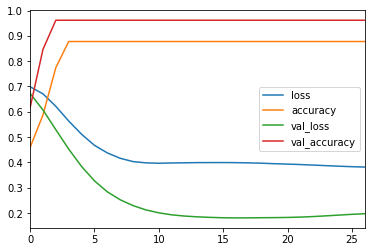

In [20]:
loss = pd.DataFrame(model2.history.history)
loss.plot();

In [21]:
predict = model2.predict_classes(X_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       0.00      0.00      0.00         2

    accuracy                           0.96        52
   macro avg       0.48      0.50      0.49        52
weighted avg       0.92      0.96      0.94        52



c:\users\max\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
